In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
#import keras as k
#from keras.preprocessing import image

In [4]:
sys.path.insert(0, '..')
from image_eda import *

In [11]:
#import csv files, functions, variables, etc
df = pd.read_csv('../data/sample.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
#work on model tomorrow!

In [12]:
df.head()

label                   filename
0  Expressionism  Amedeo_Modigliani_133.jpg
1  Expressionism   Amedeo_Modigliani_88.jpg
2  Expressionism  Amedeo_Modigliani_189.jpg
3  Expressionism   Amedeo_Modigliani_83.jpg
4  Expressionism   Amedeo_Modigliani_28.jpg

Most images are heavily weighted towards Impressionism and Post-Impressionism. Abstract expressionism has the least amount of images.

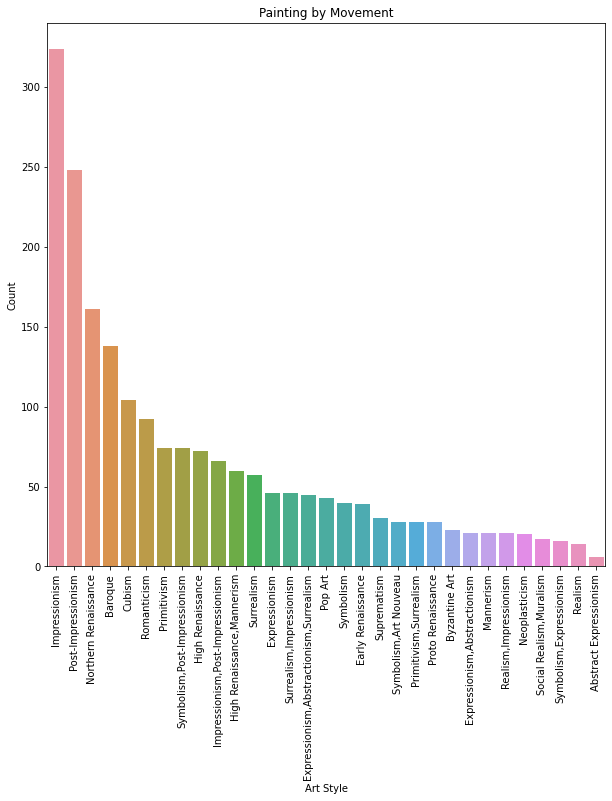

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.label.value_counts().keys(), y=df.label.value_counts())
plt.xticks(rotation='vertical')
plt.xlabel('Art Style')
plt.ylabel('Count')
plt.title('Painting by Movement')

plt.show()

In [50]:
#turn images into a matrix
def img2np(path, size = (64, 64)):
     # iterating through each file
    for fn in os.listdir(path):
        fp = os.path.join(path, fn)
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

In [51]:
dict_images = {}
for i in df.label.unique():
    newpath = os.path.join(image_path, i)
    dict_images[str(i)] = img2np(newpath)

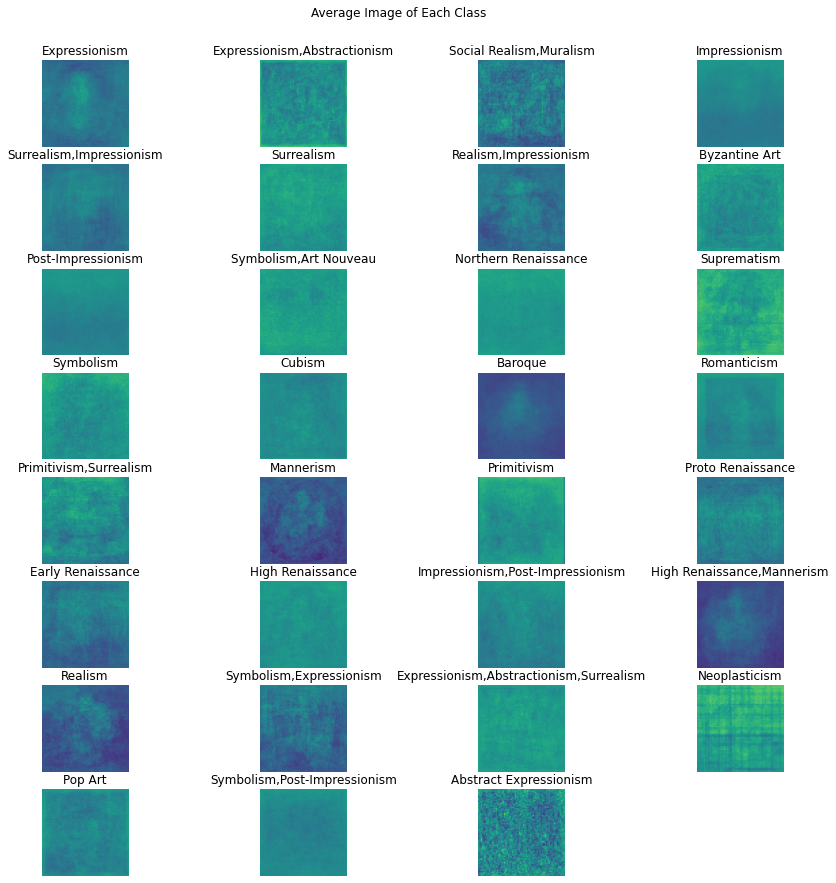

In [52]:
#average image
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    #plt.imshow(mean_img, vmin=0, vmax=255)
    #plt.title(f'Average {title}')
    #plt.axis('off')
    #plt.show()
    
    return mean_img

mean_img = {}
for i in df.label.unique():
    mean_img[str(i)] = find_mean_img(dict_images[i], i)

#fig, axes = plt.subplots(nrows=8, ncols=4)
plt.figure(figsize=(15,15))
for i in range(len(mean_img)):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(mean_img[df.label.unique()[i]], vmin=0, vmax=255)
    plt.title(df.label.unique()[i])
    plt.axis('off')

plt.suptitle('Average Image of Each Class', y=0.93)
plt.show()

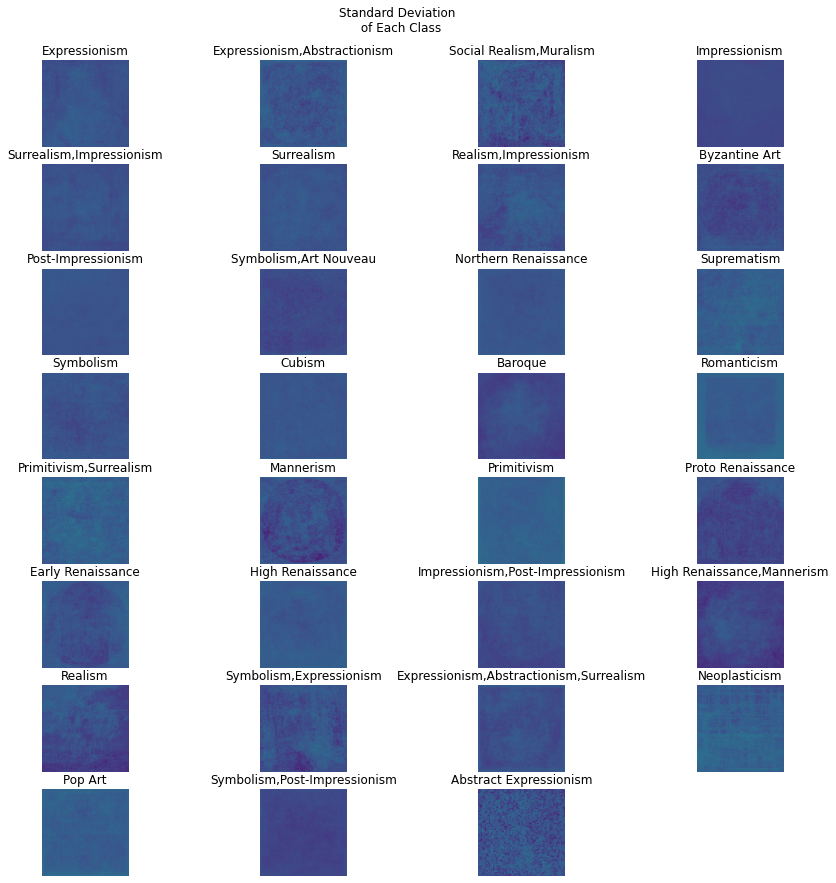

In [53]:
def find_std_img(full_mat, title, size = (64, 64)):
    # calculate the average
    std_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    
    return std_img

std_img = {}
for i in df.label.unique():
    std_img[str(i)] = find_std_img(dict_images[i], i)

plt.figure(figsize=(15,15))

for i in range(len(std_img)):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(std_img[df.label.unique()[i]], vmin=0, vmax=255)
    plt.title(df.label.unique()[i])
    plt.axis('off')
plt.suptitle('Standard Deviation \n of Each Class', y=0.93)
plt.show()

Number of PC for Expressionism:  9


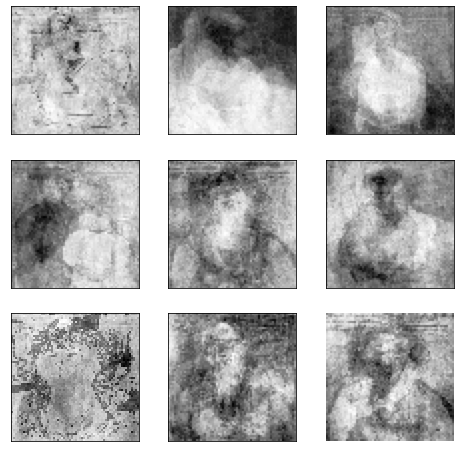

Number of PC for Expressionism,Abstractionism:  7


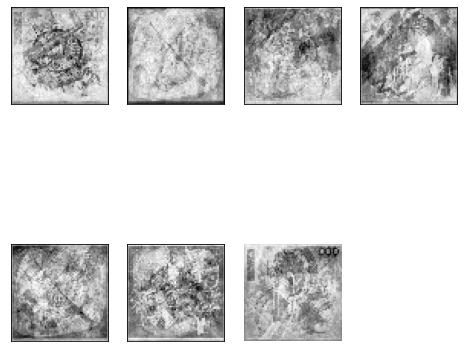

Number of PC for Social Realism,Muralism:  6


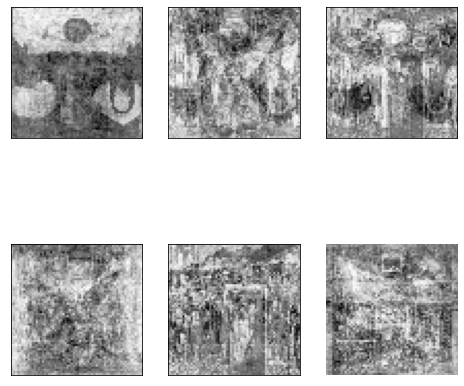

Number of PC for Impressionism:  28


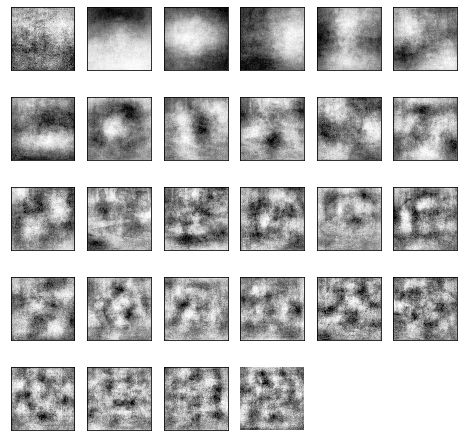

Number of PC for Surrealism,Impressionism:  7


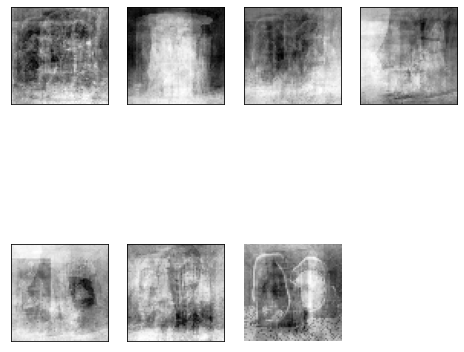

Number of PC for Surrealism:  10


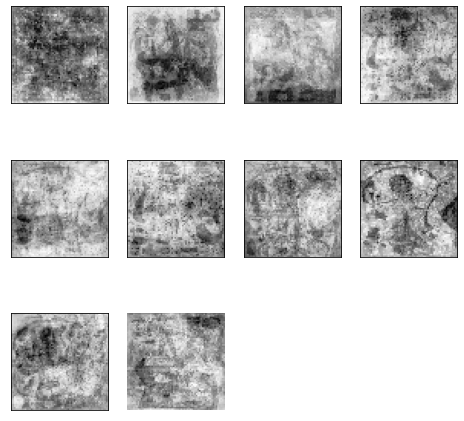

Number of PC for Realism,Impressionism:  6


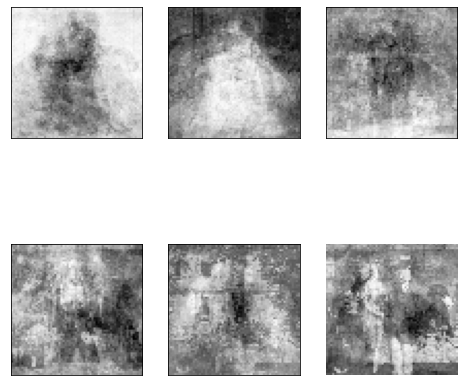

Number of PC for Byzantine Art:  8


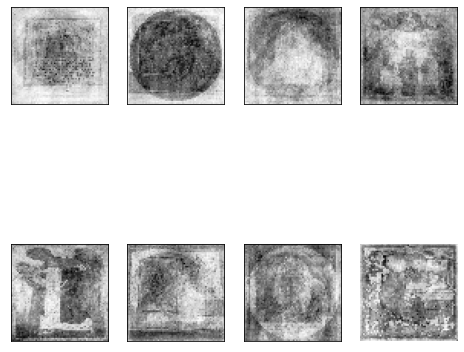

Number of PC for Post-Impressionism:  27


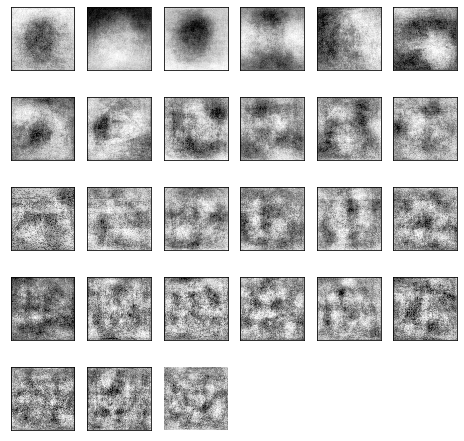

Number of PC for Symbolism,Art Nouveau:  3


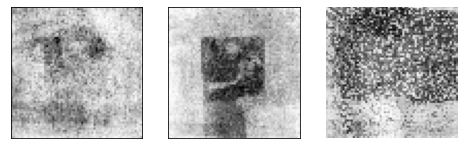

Number of PC for Northern Renaissance:  18


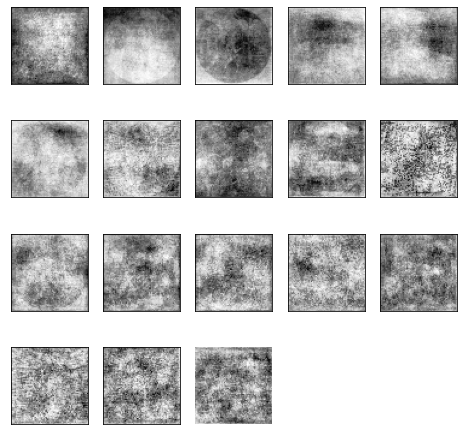

Number of PC for Suprematism:  7


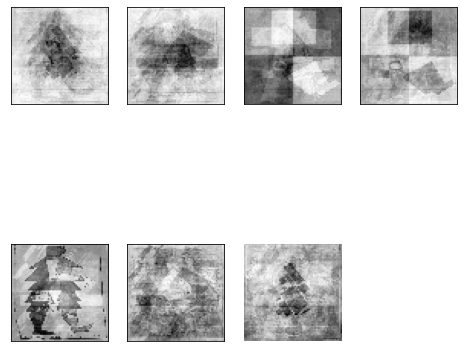

Number of PC for Symbolism:  8


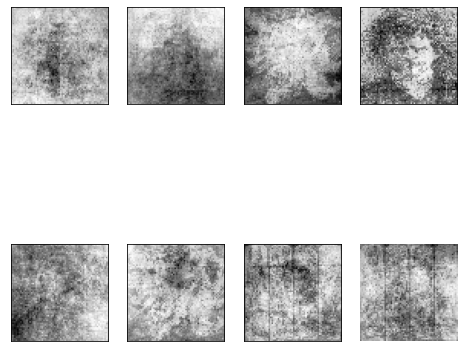

Number of PC for Cubism:  22


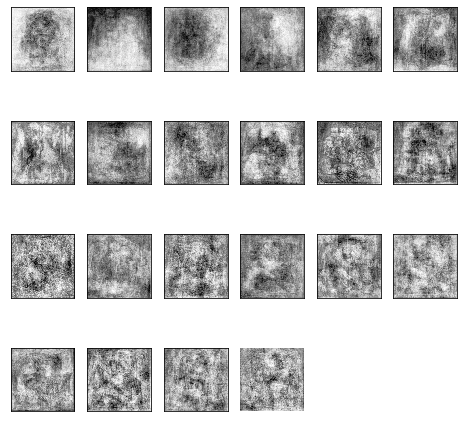

Number of PC for Baroque:  15


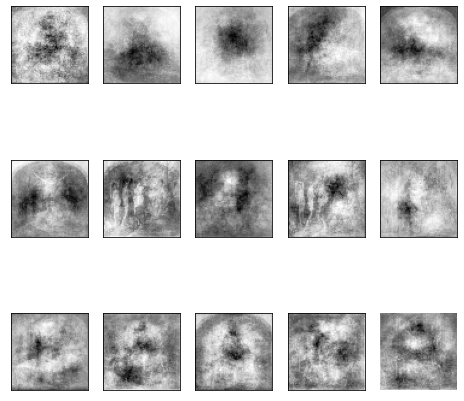

Number of PC for Romanticism:  7


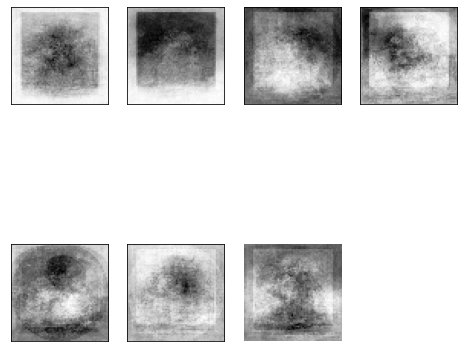

Number of PC for Primitivism,Surrealism:  10


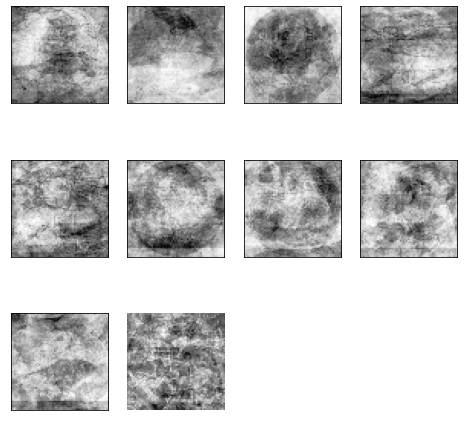

Number of PC for Mannerism:  8


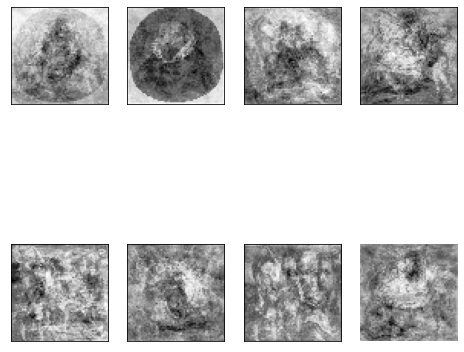

Number of PC for Primitivism:  13


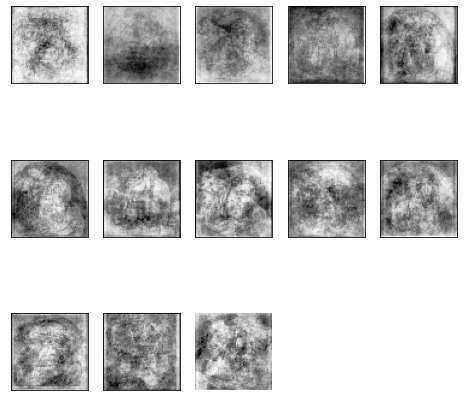

Number of PC for Proto Renaissance:  11


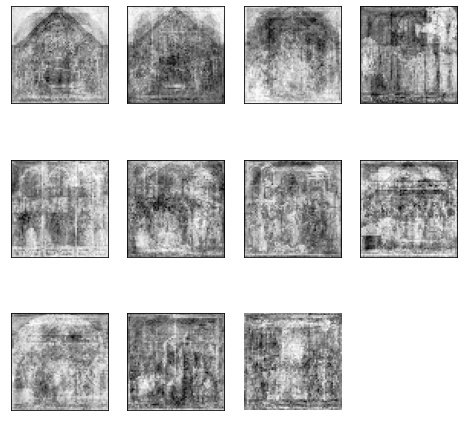

Number of PC for Early Renaissance:  11


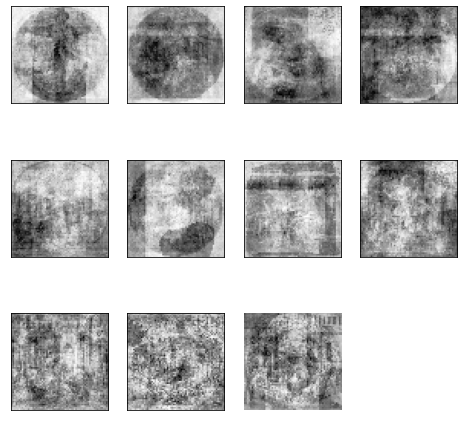

Number of PC for High Renaissance:  9


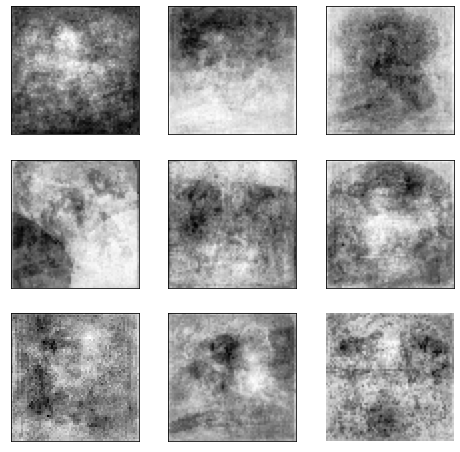

Number of PC for Impressionism,Post-Impressionism:  16


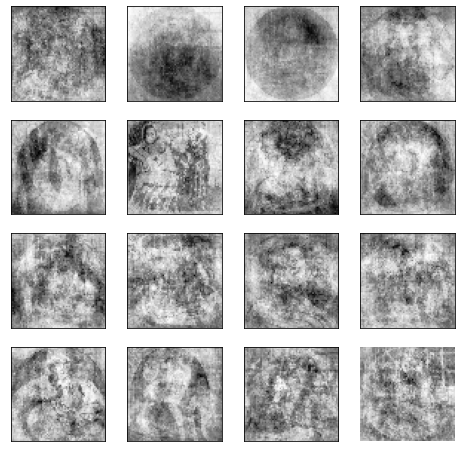

Number of PC for High Renaissance,Mannerism:  16


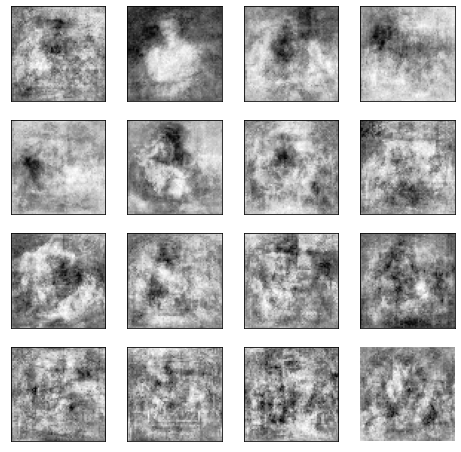

Number of PC for Realism:  4


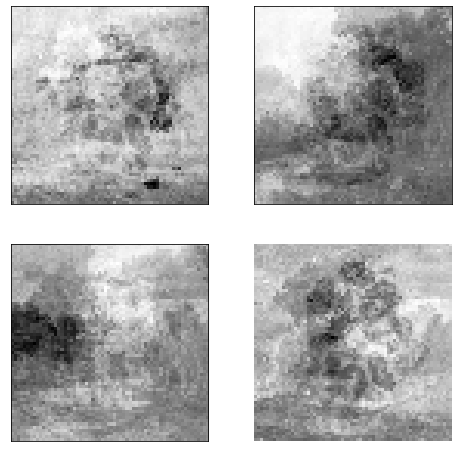

Number of PC for Symbolism,Expressionism:  6


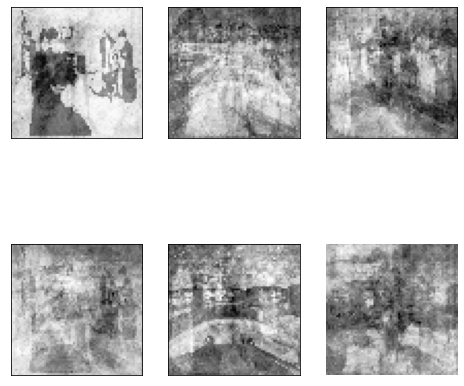

Number of PC for Expressionism,Abstractionism,Surrealism:  10


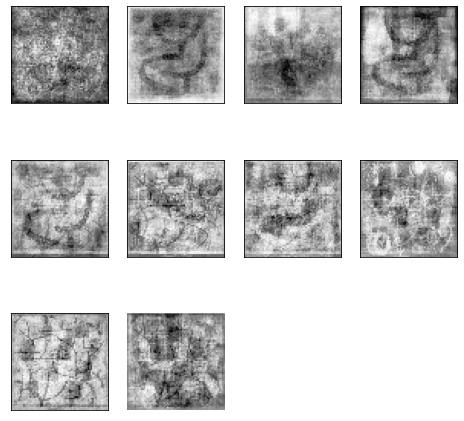

Number of PC for Neoplasticism:  5


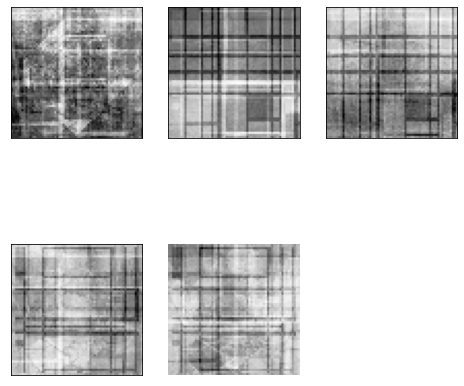

Number of PC for Pop Art:  8


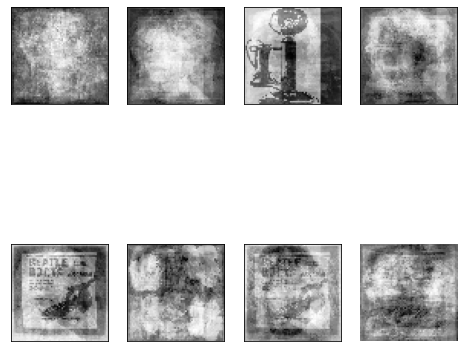

Number of PC for Symbolism,Post-Impressionism:  13


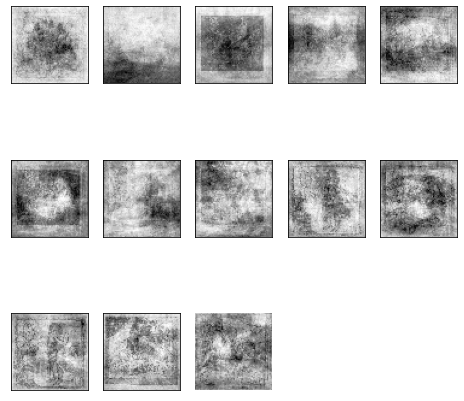

Number of PC for Abstract Expressionism:  3


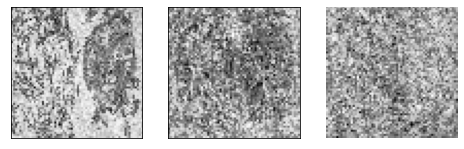

In [54]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print(f'Number of PC for {title}: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()

for i in df.label.unique():
    plot_pca(eigenimages(dict_images[i], i))
